In [1]:
import ssm
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Conspecific_Tracking_ta_edit_117 as cs
from scipy import interpolate 
from scipy import misc
from beating import rotation
from beating import tail_spline,filter_tailbeating

In [2]:
path = "/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/DSI-Students/Yuqi_scripts/top example.h5"
f = pd.HDFStore(path,'r')
data_top = f.get('df_with_missing')

In [3]:
data_top.columns = data_top.columns.droplevel()
data_top1 = cs.auto_scoring_tracefilter(data_top)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
data_top2 = data_top1[data_top1.isnull()["F_spine1"]["x"]== False].fillna(method = "ffill")

In [5]:
data_top2

bodyparts      A_head                        B_rightoperculum              \
coords              x           y likelihood                x           y   
0          415.946948  177.326215   0.959429       385.814809  183.664918   
1          418.014186  178.462459   0.955257       384.996427  183.167860   
2          417.105943  176.876360   0.943769       384.518239  181.424752   
3          416.606345  177.777748   0.985256       385.086024  182.960127   
4          419.273356  175.782816   0.969223       386.812540  181.418791   
...               ...         ...        ...              ...         ...   
216055     115.224273  428.042881   0.985239       130.866148  403.266978   
216056     112.109635  429.795300   0.948975       128.535094  404.710131   
216057     110.823496  428.584533   0.983084       127.850124  404.726947   
216058     107.593892  430.485992   0.988081       125.272988  404.186574   
216059     105.617214  428.754637   0.987205       124.094361  403.971402   

bodyparts             C_tailbase                          D_tailtip  ...  \
coords    likelihood           x           y likelihood           x  ...   
0           0.952570  318.217662  146.098751   0.673566  289.014949  ...   
1           0.948758  320.453204  151.674863   0.568234  290.862930  ...   
2           0.972419  320.338798  149.399992   0.639880  289.505597  ...   
3           0.973279  321.837950  152.267511   0.390251  291.725096  ...   
4           0.981919  317.064627  146.026957   0.575809  289.992651  ...   
...              ...         ...         ...        ...         ...  ...   
216055      0.793048  211.999958  405.722123   0.437744  269.359513  ...   
216056      0.822822  217.711812  406.100222   0.159780  269.270312  ...   
216057      0.922252  209.341100  402.889189   0.197096  265.111362  ...   
216058      0.908140  213.543039  402.210792   0.184707  256.298375  ...   
216059      0.903140  211.850021  400.798593   0.217004  260.408660  ...   

bodyparts N_righteye O_dorsaltip                        P_analtipfront  \
coords    likelihood           x           y likelihood              x   
0           0.984336  306.002802  139.314127   0.454427     386.164043   
1           0.964542  302.370958  140.394541   0.131689     373.335630   
2           0.933459  305.050504  139.756470   0.050716     372.818843   
3           0.958047  298.334596  138.285726   0.054004     373.832608   
4           0.956734  299.906851  139.701604   0.172871     375.286906   
...              ...         ...         ...        ...            ...   
216055      0.965007  219.245724  409.192145   0.012624     176.582889   
216056      0.973490  218.661550  408.480131   0.023082     180.040638   
216057      0.934129  209.103492  408.061889   0.008485     162.651323   
216058      0.854129  206.665428  410.733885   0.016047     172.478179   
216059      0.891931  203.930601  410.184324   0.013657     142.734169   

bodyparts                        Q_analtipback                         
coords              y likelihood             x           y likelihood  
0          141.569612   0.011742    313.975855  142.270941   0.001547  
1          178.835227   0.024423    328.618773  150.077028   0.001636  
2          178.789937   0.017629    322.741209  150.062513   0.002204  
3          178.992960   0.020791    328.441117  149.989664   0.006967  
4          177.380033   0.024975    291.567868  138.161612   0.003067  
...               ...        ...           ...         ...        ...  
216055     417.658646   0.026593    206.345652  407.906617   0.003529  
216056     412.004125   0.046400    194.534151  407.084077   0.015347  
216057     422.723468   0.034243    192.216555  405.554355   0.003764  
216058     412.623683   0.039974    189.440412  404.005210   0.007338  
216059     396.243218   0.070764    202.025167  402.553108   0.009501  

[202164 rows x 51 columns]

In [6]:
data_tail = filter_tailbeating(data_top2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
na_list = []
for i in range(data_tail.shape[1]):
    na_list.append(sum(data_tail.iloc[:,i].isna()))
na_list   

[113447,
 113447,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 61253,
 61253,
 0,
 110500,
 110500,
 0,
 116881,
 116881,
 0,
 63042,
 63042,
 0,
 118471,
 118471,
 0,
 173087,
 173087,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
rotate_spline = rotation(data_top2.iloc[90000:95000,:])

In [6]:
# end-start = 9.757262229919434 min for 80000-150000

## rotate validation

In [36]:
head = np.column_stack([data_top2["A_head"]["x"],data_top2["A_head"]["y"]])
spline1 = np.column_stack([data_top2["F_spine1"]["x"],data_top2["F_spine1"]["y"]])
head_r = head-spline1
spline1 = np.zeros(spline1.shape)
norm = []
for i in range(len(head_r)):
    norm.append(np.linalg.norm(head_r[i]))
norm = np.array(norm)
angle = np.column_stack([head_r[:,0]/norm, head_r[:,1]/norm])
angle2 = np.column_stack([-angle[:,1],angle[:,0]])
rot_matrix = np.column_stack([angle,angle2])

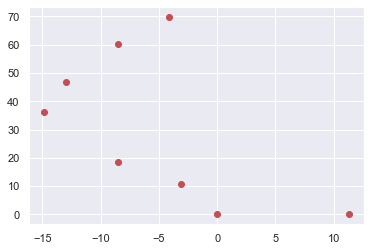

In [41]:
point_set = {}
for i in range(91000,91006):
    head_n = np.dot(rot_matrix[i].reshape(2,2), head_r[i])
    point_set[i] = np.vstack([head_n, rotate_spline[i-90000]])
i = 91004
x = point_set[i]
plt.plot(x[:,0],x[:,1],"ro")

## fit a interpolate

In [9]:
i=1002
x = np.vstack(rotate_spline[i])[:,0]
y = np.vstack(rotate_spline[i])[:,1]
#f = interpolate.interp1d(x,y)
#f2 = interpolate.interp1d(x, y, kind='cubic')
#xnew = np.linspace(min(x), max(x), num=41, endpoint=True)
#plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
#plt.legend(['data', 'linear', 'cubic'], loc='best')
#plt.show()

In [10]:
#f = interpolate.InterpolatedUnivariateSpline(x[::-1],y[::-1])
#f_1 = f.derivative()
#f_1(x)

In [11]:
#tck, u = interpolate.splprep([x, y], s=0)

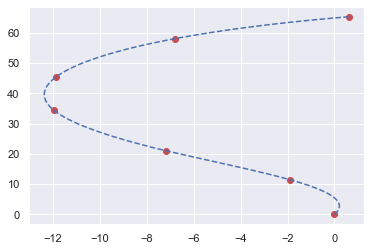

In [12]:
## interpolate function
pts = np.array(rotate_spline[i])
tck, u = interpolate.splprep(pts.T, u=None, s=0.0) 
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = interpolate.splev(u_new, tck, der=0)

plt.plot(pts[:,0], pts[:,1], 'ro')
plt.plot(x_new, y_new, 'b--')
plt.show()

In [16]:
yder = interpolate.splev(u, tck, der=1)

In [17]:
yder

[array([ 12.38956065, -29.40807198, -34.39187696, -11.2331082 ,
         12.51872952,  40.78658772,  61.76968167]),
 array([80.02429608, 64.16634669, 63.74170253, 70.85463656, 71.2906637 ,
        59.22810396, 39.46026218])]

In [18]:
(yder[0])/(yder[1])

array([ 0.15482249, -0.4583099 , -0.53955065, -0.15853738,  0.17560125,
        0.68863571,  1.5653642 ])

In [15]:
x

array([  0.        ,  -3.5274497 ,  -8.64879986, -14.94535141,
       -15.97873141,  -9.42325277,  -6.43239317])

In [28]:
def tail_spline(rotate_points):
    tail = []
    for i in range(len(rotate_points)):
        pts = np.array(rotate_points[i])
        tck, u = interpolate.splprep(pts.T, u=None, s=0.0, per=1)
        x = np.vstack(rotate_points[i])[:,0]
        yder = interpolate.splev(u, tck, der=1)
        tail.append((yder[0])/(yder[1]))
    return(tail)